# CNN Pneumonia Detector


Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

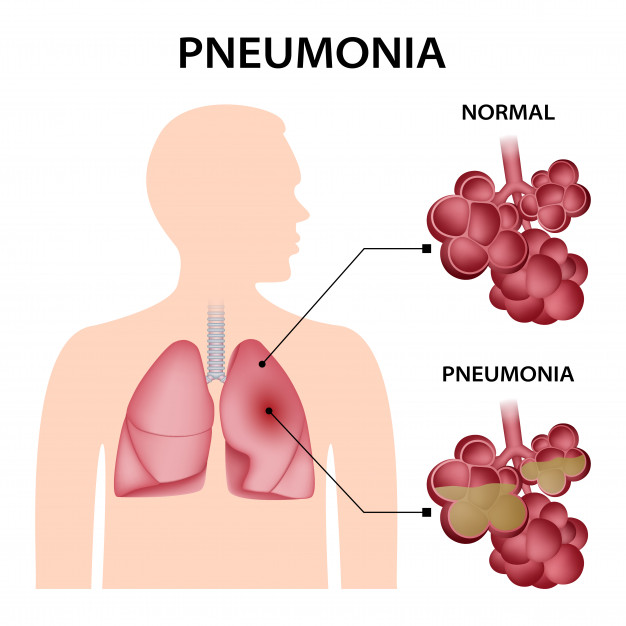


The most common way to diagnose pneumonia is by means of a **chest x-ray**. This is a 2D image that reflects the density of the tissues. When x-ray beams pass through the body, they are absorbed in different amounts depending on the density of the material through which they pass. Dense materials, such as bone and metal, appear white on X-rays, but air, however, appears black. As healthy lungs are filled with air, they appear black. However, because fluid is denser than air, when the alveoli are filled with fluid (i.e. pneumonia), certain areas of the lungs appear white. Sometimes it is very clear, but sometimes... not so much:

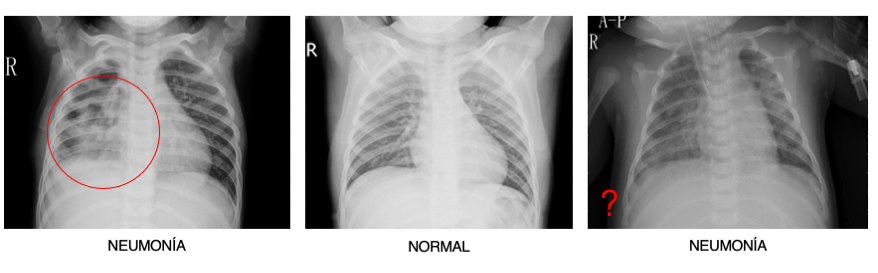


It is clear that the practice and experience of the professionals means that they are able to see what we cannot see with the naked eye, and can thus determine in which cases an X-ray does or does not show pneumonia. However, the workflow they have to process is so high that it is normal for them to miss some cases. And not only that. Reading a single X-ray takes a lot of time and resources, because several specialists are involved in the reading. 

It is for this reason that AI algorithms are being applied in the reading of X-rays. NOT to omit the radiologists job and leave the diagnosis to the result of the algorithm, but to:

+ reduce the workflow by screening programmes that speed up the diagnosis
+ to show new features that may not be recognisable to the human eye but exist 
+ be a further diagnostic support

The good news... is that this doesn't have to be an over complicated algorithm!!! Of course there are companies whose job it's to make such algorithms, and the sophistication they achieve is greater than what we can do here. However we are going to run a Convolutional Neural Network (CNN) to help us distinguish whether or not a chest X-ray is indicative of pneumonia. 

Before we begin, you should know that a notebook you are about to make is based on a notebook from the Kaggle repository ([this](https://www.kaggle.com/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia)), which is freely accessible to all of you. I encourage you to do so, download a notebook that does something that catches your attention and investigate what and how it does it. 

[Kaggle](https://www.kaggle.com/) is a platform where you can find both datasets of all kinds (images, data...) and notebooks that have already been solved. They also have a lot of interesting competitions, it's great to start exploring the world of programming and AI!!!

### First: Import the needed libraries

In [230]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt #for plotting things
import os
import pandas as pd
from PIL import Image
import glob as glob

In [2]:
import tensorflow

In [231]:
# We are training our CNN with Keras
import keras
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Conv2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

from itertools import chain
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix, average_precision_score
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50 
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

 # 1. Exploratory Data Analysis (EDA)
 
Before begining, we must **always** know first about our data (how many they are, what kind...). The Exploratory Data Analysis (EDA) is the very first important step. In fact, it is normal if it takes the 80% of the time, whereas the 20% goes for the model. We must to make sure that we are training our model just with the data we want (i.e. removing outliers or... cute puppies). 

![dog.png](dog.png)



In most cases, if you download a dataset from a platform such as Kaggle, the data will be *tagged*. That is, if we download, for example, a dataset with images of cats and dogs, each image will have a label indicating whether it is a dog or a cat. When we work in this way, we say that we are doing ***Supervised Learning*** or supervised training. If this were not the case, it would be *unsupervised*, but this would be a more advanced lesson. 

In our case, the original dataset already contains the labelled images: 

+ "Normal": radiographs of patients without pneumonia.
+ "Pneumonia": X-rays of patients with pneumonia

But we will come to this later...

It is important, before training the model, to split the data. Why? Easy! Because if we train an algorithm with a series of images, we don't want these images to be repeated when we test its accuracy, because then our model would be "cheating". For this reason, we divide our dataset into three sets: 

1. **Train**: contains the data/images that are going to train our model.

2. **Validation**: contains the data/images that will be used to validate the model. The purpose of this data is to avoid ***Overfitting***, i.e. to prevent the model from learning Train's images too much by heart and then being able to correctly interpret an image that it has not previously seen. 

3. **Test**: here are the data/images that will be used to test the model once it has been trained (NEVER BEFORE!!! because we don't want the model to "see" the test images too early and memorise them).

![train_test_val.png](train_test_val.png)

How is the data split? Normally, the dataset is first divided into **Train and Test**. The Test is not touched until the end, while the Train is divided again into 80% Train and 20% Validation (it does not have to be these percentages, it is an example, but it is usually approximate). The model is trained with this 80% Train and validated iteratively with the Validation set (this is called *Cross Validation*). 

There are many ways to split the datasets. The most common is to use already created libraries, like ``sklearn``: 

![train-test-val-2.png](train-test-val-2.png)

### WARNING

However, in this particular case, the Kaggle dataset was already divided into train, test and validation sets, so we don't have to worry about this step this time.

![folders](folders.png)

### 1. 2 Loading data

In [29]:
path = '/Users/mercedes/Documents/AI_Saturdays_Madrid/Epitech/Pneumonia_Detector_Epitech/chest_xray/' #personal path
mainDIR = os.listdir(path)
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [32]:
test_folder =  path + mainDIR[1]
train_folder = path + mainDIR[2]
val_folder =   path + mainDIR[3]

# train 
train_n = train_folder+'/NORMAL/'
train_p = train_folder+'/PNEUMONIA/'


# validation
val_n = val_folder+'/NORMAL/'
val_p = val_folder+'/PNEUMONIA/'


# test
test_n = test_folder+'/NORMAL/'
test_p = test_folder+'/PNEUMONIA/'


### 1.3. Let's see some of the images

1342
Normal:  NORMAL2-IM-1164-0001.jpeg
Pneumonia: person506_virus_1018.jpeg


Text(0.5, 1.0, 'Pneumonía')

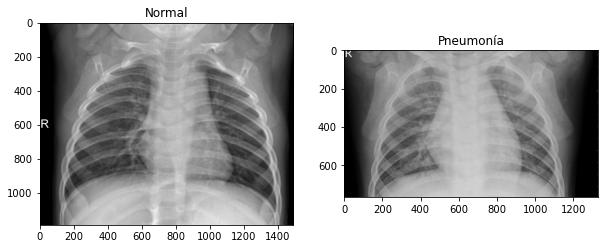

In [37]:
#Normal 
print(len(os.listdir(train_n)))

rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('Normal: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('Pneumonia:', sic_pic)

# Loading images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# Showing images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load, 'gray')
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load, 'gray')
a2.set_title('Pneumonía')

These two images are randomly generated from the training dataset. As you can see, there are differences between them, so let's create a CNN that can objectively determine what these differences are and classify them into two classes: normal and pneumonia.

### Friendly Reminder... How does a CNN work?

To answer this question, we must first answer another one: **How does a computer see?**

The way we (mammals and almost every other animal with two eyes and a developed brain) see the world goes something like this:
1. Light rays reflected from an object hit your retina.
2. The sensory input is transported to your brain.
3. The brain, after interpreting the input, tells you what it sees. 

Also, from the time you are little the world teaches you what things are, it teaches you to label everything you see. **You know that an elephant is an elephant because you look at it and someone tells you that this object is an animal called an elephant**. Your brain stores that association and you don't have to relearn it. 

Computers, however, do not have the learning capacity that we have. They need to "look at" and analyse thousands and thousands of images before they can generalise and say that an elephant falls into the same category as a lion (mammalian animal category). This is because what they see are not images, but numerical representations of **pixels** that describe these images. So while we see "things" in images, a computer sees this....

![](https://cdn-images-1.medium.com/max/1600/1*cot55wd6gdoJlovlCw0AAQ.png)

Furthermore, our brain's way of visualising and processing images is very useful and efficient. The neurons dedicated to vision do not all work at the same time, but there are certain neurons that are trained to respond to a specific **receptive field**: that is, some neurons identify vertical lines, others horizontal lines, others colours... and this is precisely what Convolutional Neural Networks are based on.



### CNNs to the rescue

A convolutional neural network is a special type of neural network (AI algorithm) consisting of multiple layers of convolutional filters. A mathematical operation called **convolution** is used to process the image data. 

As with the neurons in our visual cortex, the neurons in one convolution layer of a CNN are not connected to all the neurons in the next layer (which would be a *fully connected* layer), but only a small region of one layer is connected to neurons in another small region of the next layer. This is what makes CNNs a very good choice for image processing, as it is what makes them so fast. 

If you want to see in detail how a CNN works, I advise you to take a look at [this page](https://www.aprendemachinelearning.com/como-funcionan-las-convolutional-neural-networks-vision-por-ordenador/) where you will see much of the information given here. For more complexity, although it is also simple, you can go to [this one](https://www.aprendemachinelearning.com/como-funcionan-las-convolutional-neural-networks-vision-por-ordenador/). Let's see here a summary of how a CNN works: 


CNNs basically have two major steps: *feature extraction* and *classification*. 

**1) Feature extraction**: in this step, the input of the network is an image, and the output is the *features*, or most important and striking characteristics of the image (for example, if the image is a cat, it would be the whiskers, the ears, the paws...). 

* The network takes an image as input and is convolved with a filter (or *kernel*, which is nothing more than a matrix of numbers). The filter (green) scans the image (blue) performing convolution operations on each set of pixels, obtaining what is called a *feature map*. 

![https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif](https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)                                     

![Source: https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAPAQUdKCKLTgIQ.png](https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png)   

![filters.png](filters.png)

* With the different filters we create the next convolutional layer of the network, smaller than the previous one. This is called *pooling*. The most famous function is called *max pooling* and is the one we are going to use next. You lose practically no information and save a lot of time. 

![https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png](https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png)



**2) Classification**: another advantage of CNNs is that it is not necessary to create a CNN from scratch every time we want to create a classifier. Simply, we must look for a "pre-trained" one, that is to say, that already has many layers trained in the feature extraction to identify stripes, colours, circular lines... and simply adapt the last layers to our particular case. This is called *transfer learning*, and the following and optional step, is *fine tuning*.

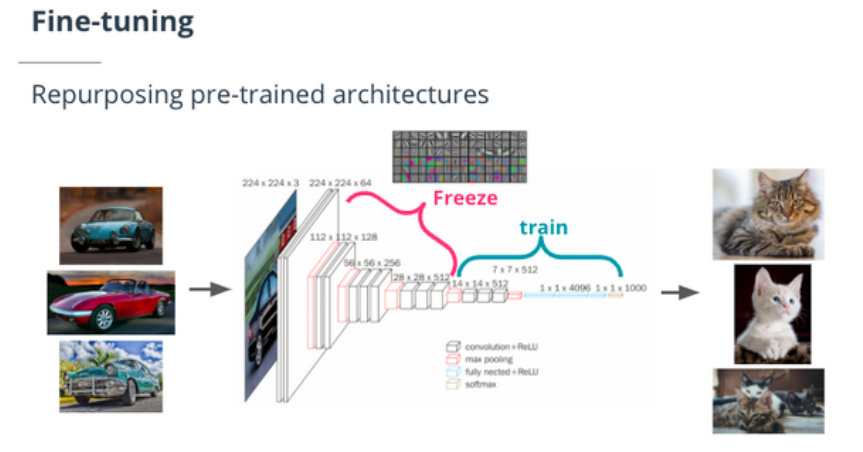


### <font color ='red'>  There is an easy way to tackle this problem!!! </font>
    
Nowadays CNNs are very easy to implement and train, because there are many libraries like Keras that make our lives easier. **Keras** is simply a python library to do DL.

## ¿Ready?  3...2...1...*Let's code!!*


* We are going to build a CNN with 2 convolutional layers. After each convolution, a *pooling layer* will be added using the *max pooling* function mentioned before.

* After the second convolutional layer, two dense layers will be added (*fully connected*) which will have as output the feature map of each image, and will make the predictions. The second dense layer has only one unit because the output is binary. 

* When we compile the model, it will be done using an optimisation function (Adam) that we are not going to explain in this notebook, but it is good that you know that they exist. 

In [232]:
# Sequential() allows us to add layers: 

cnn = Sequential()

# Feature extraction

# Step 1: add the first convolutional layer with ReLu activation
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Step 2: max pooling to the first
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3: add the second convolutional layer with ReLu activation
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# Step 4: max pooling to the second layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5: Flatten the layer 
cnn.add(Flatten())

# Classification 

# Step 6: we add two dense layers for classification
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1)) #Binary


#Optimizer
opt = Adam(learning_rate= 0.0005)

# Compile
cnn.compile(optimizer = opt, loss = 'binary_crossentropy', 
            metrics = ['accuracy'])


In [233]:
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

**Now we train our model with the training set**

In [227]:
num_of_test_samples = 600
batch_size = 60

In [210]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)  # Data augmentation

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

val_datagen = ImageDataGenerator(rescale=1. / 255.0)

validation_generator = val_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [234]:
valX, valY = validation_generator.next()

In [235]:
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

**Compile the model**

In [236]:
#From Keras documentation
weight_path = '{}_my_model.best.hdf5'.format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, 
                             mode='min', save_weights_only= True)
early = EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 100)
callbacks_list = [checkpoint, early]

In [237]:
cnn_model = cnn.fit(training_set,
                      epochs = 25,
                      steps_per_epoch= len(training_set)/batch_size, 
                      validation_data = (valX, valY),
                      callbacks= callbacks_list)

Epoch 1/25
2/2 [==============================] - 14s 3s/step - loss: 0.6974 - accuracy: 0.4193 - val_loss: 0.7869 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.78693, saving model to xray_class_my_model.best.hdf5
Epoch 2/25
2/2 [==============================] - 5s 2s/step - loss: 0.5073 - accuracy: 0.8268 - val_loss: 0.9578 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.78693
Epoch 3/25
2/2 [==============================] - 8s 3s/step - loss: 0.6407 - accuracy: 0.7188 - val_loss: 0.8271 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.78693
Epoch 4/25
2/2 [==============================] - 8s 3s/step - loss: 0.5238 - accuracy: 0.7878 - val_loss: 0.8094 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.78693
Epoch 5/25
2/2 [==============================] - 10s 4s/step - loss: 0.5780 - accuracy: 0.7331 - val_loss: 0.8296 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.78693
Epoch 

In [215]:
model_history = pd.DataFrame(cnn_model.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.772015,0.666667,0.692270,0.5625
1,0.688601,0.541667,0.710682,0.5000
2,0.644407,0.635417,0.817596,0.5000
3,0.578810,0.729167,0.829959,0.5000
4,0.548211,0.760417,0.805345,0.5000
5,0.577238,0.718750,0.744133,0.5000
6,0.526626,0.760417,0.782473,0.5000
7,0.526412,0.750000,0.815675,0.5000
8,0.457286,0.791667,0.750518,0.5000
9,0.553798,0.697917,0.628536,0.6875


In [216]:
test_accu = cnn.evaluate(test_set, steps= len(training_set)/batch_size)

2/2 [==============================] - 2s 601ms/step - loss: 0.3101 - accuracy: 0.8958


In [217]:
print('Test accuracy:',test_accu[1]*100, '%')

Test accuracy: 89.58333134651184 %


## <font color='navy'>We did it!! </font>


![https://media.giphy.com/media/3ov9jG4eqz9k3XXsU8/giphy.gif](https://media.giphy.com/media/3ov9jG4eqz9k3XXsU8/giphy.gif)

#### But... Not all that glitters is gold!!!!!!!!!!!

![https://media.giphy.com/media/wb6xgCSpLl0m4/giphy.gif](https://media.giphy.com/media/wb6xgCSpLl0m4/giphy.gif)

### Model evaluation

Each time all the training data passes through the CNN, we call this an **epoch**. At the end of each epoch, a loss function is applied that calculates how different the ground truth prediction is. This difference is the **training loss**. The model uses this value to update the filter weights. This technique is called **backpropagation**.

At the end of each epoch, we also use that loss function to evaluate the loss in the validation set and get a validation loss that measures how well the prediction matches the validation data. The validation set is just to test the performance of the model.

If the loss is small, it means that the model has correctly classified the images (or at least most of them) it has seen in that epoch.

In [136]:
# Some metrics

def plot_roc_curve(ground_truth, probability):
    fpr, tpr , threshold_roc = roc_curve(ground_truth, probability)
    sens = tpr; esp = fpr
    plt.plot(esp, sens); plt.ylabel('Sensitivity'); plt.xlabel('1-Especificity')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Pneumonia', auc(fpr, tpr)))
    plt.legend()
    return
    
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(ground_truth, probability):
    precisions, recalls, thresholds = precision_recall_curve(ground_truth, probability)
    plt.plot(recalls, precisions, label = '%s (AP Score:%0.2f)'  % ('Pneumonia', average_precision_score(ground_truth, probability)))
    plt.ylabel('Precision'); plt.xlabel('Recall')
    plt.show()
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall'); 
    plt.xlabel('Threshold'); plt.grid()
    plt.legend()
    return(precisions, recalls, thresholds)

#Also consider plotting the history of your model training:

def plot_history(history):
    
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.show()
    return

The graph below shows the process of loss throughout each epoch

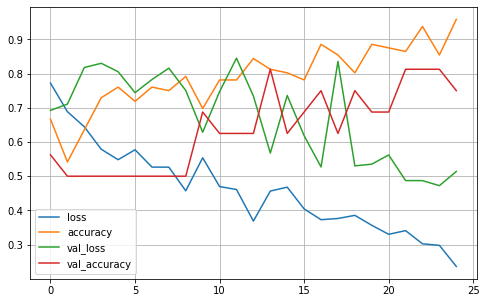

In [218]:
plot_history(cnn_model)

Let's see what happens here... 

+ The **blue** and **orange** lines correspond to the **training data** (loss and accuracy respectively). We see that as the epochs progress, the losses are getting smaller and smaller (logically, because the model is doing *backpropagation*) and the accuracy is increasing. 

+ The **green** and **red** lines correspond to the **validation data**. We also see that the losses are decreasing and the accuracy (i.e. how close our prediction is to the truth) is increasing. 

We see that the losses decrease and the accuracy increases. Great, isn't it? However, we need to notice two things: 

1. **The accuracy of the training data (orange) is much higher than that of the validation data (red)**. 
2. **The loss of the training data (blue) is much better than that of the validation data (green)**. 

What does this mean? Simple... our model is fitting the training data *too well*. We say then that our model has **overtiffing**, which is why the accuracy we obtained was so good (90%). 

How do we avoid *overfitting*?

- Increase the dataset
- Reduce the number of features 
- Model regularisation: reduce complexity (layers), add parameters, try another optimisation function...
- Early stopping

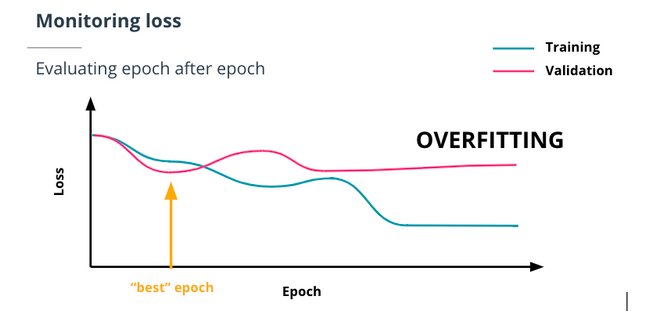

And many techniques that make it possible to make a graph like the one above look like this: 

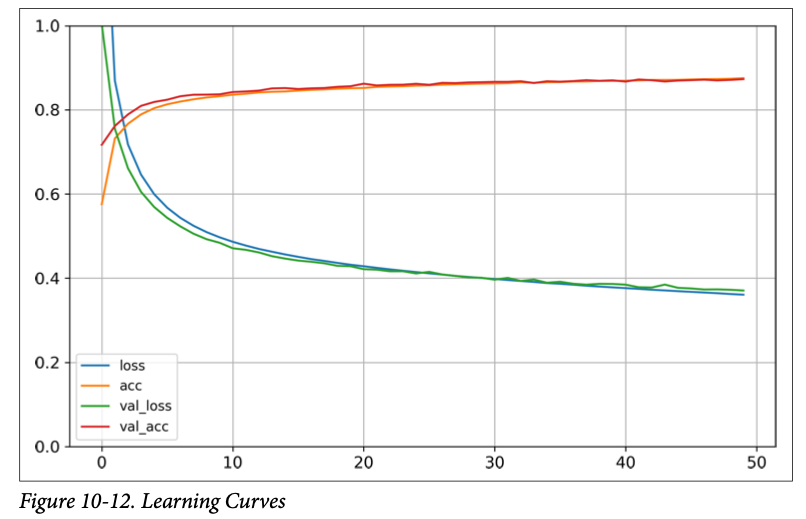


### Other metrics

We can evaluate our model with more metrics: ROC Curve, precision-recall (PR) curve...

In [139]:
pred_Y = cnn.predict(valX, batch_size = 100, verbose = True)
prediction = pred_Y.reshape(-1) # This is the result of the prediction
label= valY.reshape(-1) 

1/1 [==============================] - 0s 484ms/step


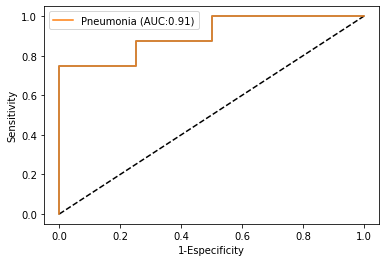

In [140]:
auc_curve = plot_roc_curve(valY, pred_Y)

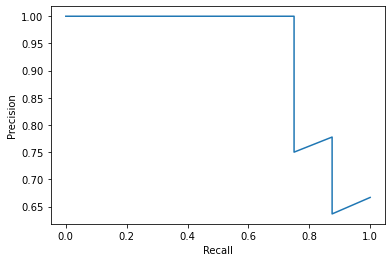

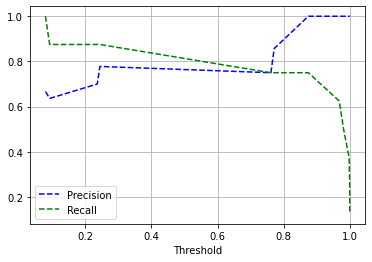

In [141]:
precisions, recalls, thresholds = plot_precision_recall_curve(valY, pred_Y)

In [142]:
performances = pd.DataFrame({'ground_truth': label, 'probability': prediction})
performances.to_csv('performances.csv')
performances

,ground_truth,probability
0,1.0,0.244271
1,1.0,0.980655
2,0.0,0.026761
3,1.0,0.967341
4,0.0,0.092441
5,0.0,0.236262
6,0.0,0.074157
7,0.0,0.760921
8,0.0,0.077153
9,0.0,0.017868


## To Sum up

I hope you enjoyed our journey through this notebook. I strongly encourage you to improve the model's accuracy and its overfitting in order to start, or continue, your adventure in Deep Learning. Feel free to download this notebook and change everything you want, try new things to fight that overfitting, increase the accuracy and help to make a good pneumonia diagnosis using AI tools... do you think you can? Of course, You Can!!!

May the code be with you and... Good Luck!

![](darth_vader.gif)